In [1]:

import nbodykit
import numpy as np
from nbodykit.lab import *
import matplotlib.pyplot as plt
from matplotlib import colors, cm
import matplotlib
import os
import time
import pandas as pd
from math import comb
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
from sklearn.gaussian_process import GaussianProcessRegressor

# from Pk_tools import Fourier, smooth_field, get_Pk
# again, this only works on startup!
from jax import config
config.update("jax_enable_x64", True)
import jax
import jax.numpy as jnp
from numpy import sin as sin
from numpy import cos as cos
ngrid=256

In [4]:
path = '/mnt/extraspace/jesscowell/MarkedCorr/COLA_PKs/'
# theory_cola = []
# # theory_cola = np.load(path+f'theoretical_cov_seed_{seed}.npy')
# Pks=[]
# pk_test = np.load(path+f'seed1000_Pks.npy')
# for seed in range(1000,1100): #1100
#     try:
#         th = np.load(path+f'theoretical_cov_seed_{seed}.npy')
#         theory_cola.append(th)
#     except:
#         print(f'not loaded {seed}')
# np.save('theoretical_cov_COLA', theory_cola)
theory_cola =np.load('theoretical_cov_COLA.npy')

In [5]:
cola_th_mean=np.mean(theory_cola, axis = 0)

In [6]:
path = '/mnt/extraspace/jesscowell/MarkedCorr/COLA_PKs/'
theory=np.load(path+'theoretical_cov.npy')
seed=1000
theory_cola = []
# theory_cola = np.load(path+f'theoretical_cov_seed_{seed}.npy')
Pks=[]
pk_test = np.load(path+f'seed1000_Pks.npy')
for seed in range(1000,1100): #1100
    try:
        th = np.load(path+f'theoretical_cov_seed_{seed}.npy')
        theory_cola.append(th)
    except:
        print(f'not loaded {seed}')
    PK_og = (np.load(path+f'seed{seed}_Pks.npy'))
#     print(PK_og.shape)
    PK=PK_og
#     PK=PK_og.reshape(14,14,34)
#     print(PK[5, 5, :]- PK_og[5*14+5, :])
    
    PK=PK.reshape(14,14,34)
    
    arr=[]
    for i in range(0,14):
#         row = PK[i*14,  :]
        row = PK[i, :, :]
        new_stuff = row[i:]
#         print(len(new_stuff))
        for x in new_stuff:
            arr.append(x)

    output = np.array(arr).flatten()
    Pks.append(output)
    


In [7]:
print(np.shape(Pks))
print(np.shape(pk_test))
print(np.shape(theory))
Pk_mean=np.mean(Pks, axis=0)
cola_th_mean=np.mean(theory_cola, axis = 0)

(100, 3570)
(196, 34)
(3570, 3570)


(3570, 3570)


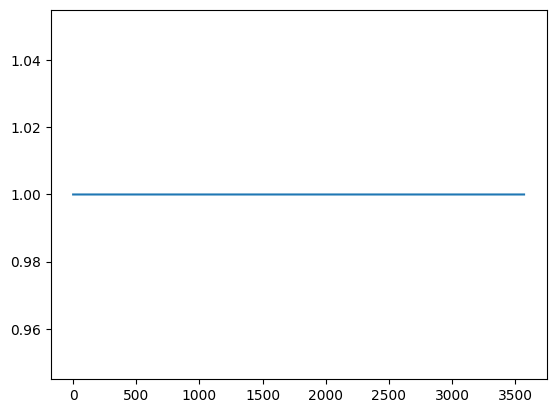

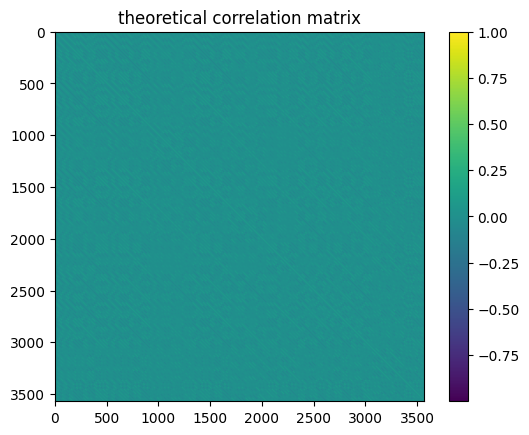

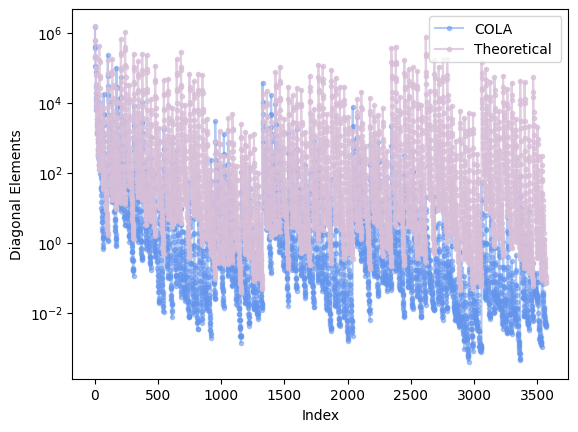

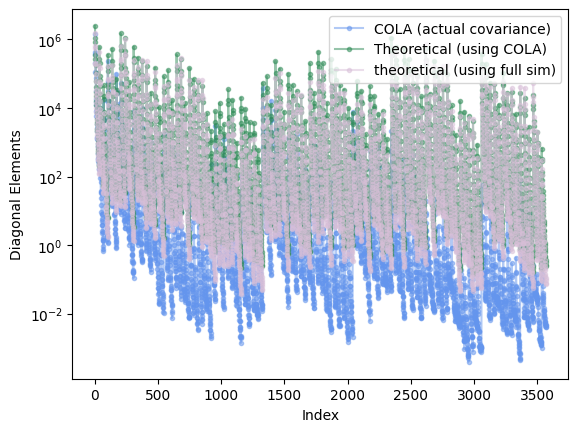

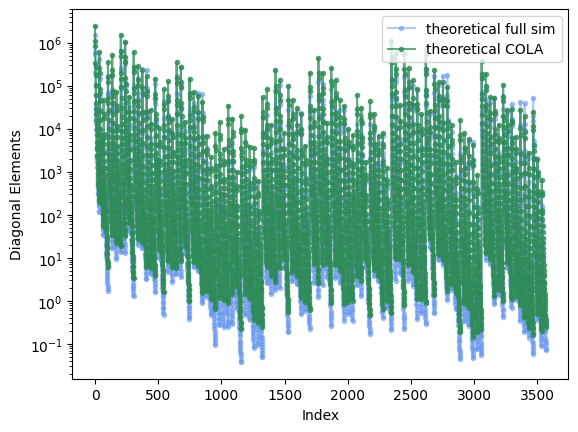

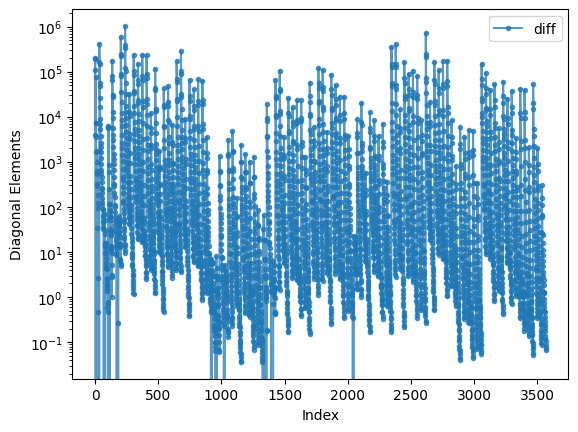

In [8]:
Pk_pow=np.array(Pks)
# Pk_mean=np.array(Pk_mean)
# th_mat_blocks = []
cov = np.cov(Pk_pow.T)
print(np.shape(cov))

plt.plot(np.diag(np.corrcoef(theory)))
plt.show()
# 


plt.imshow(np.corrcoef(theory))
plt.title('theoretical correlation matrix')
plt.colorbar()
plt.show()



plt.plot(np.diag(cov),'.-',label='COLA', alpha=0.5, color='cornflowerblue')
plt.plot(np.diag(theory),'.-', label='Theoretical ', alpha=0.75, color='thistle')
plt.legend(loc='upper right')
# plt.ylabel('diagonal of covariance matrix')
plt.ylabel('Diagonal Elements')
plt.xlabel('Index')

plt.yscale('log')
plt.savefig('Covariances-diffs.pdf')
plt.show()

plt.plot(np.diag(cov),'.-',label='COLA (actual covariance)', alpha=0.5, color='cornflowerblue')

plt.plot(np.diag(cola_th_mean),'.-', label='Theoretical (using COLA)', alpha=0.5, color='seagreen')
plt.plot(np.diag(theory),'.-',label='theoretical (using full sim)', alpha=0.5, color='thistle')


plt.legend(loc='upper right')
# plt.ylabel('diagonal of covariance matrix')
plt.ylabel('Diagonal Elements')
plt.xlabel('Index')

plt.yscale('log')
# plt.savefig('Covariances-diffs.pdf')
plt.show()



plt.plot(np.diag(theory),'.-',label='theoretical full sim', alpha=0.5, color='cornflowerblue')
plt.plot(np.diag(cola_th_mean),'.-', label='theoretical COLA', alpha=0.75, color='seagreen')
plt.legend(loc='upper right')
# plt.ylabel('diagonal of covariance matrix')
plt.ylabel('Diagonal Elements')
plt.xlabel('Index')

plt.yscale('log')
# plt.savefig('Covariances-diffs.pdf')
plt.show()


# plt.plot(np.diag(cov),'.-',label='COLA', alpha=0.5)
plt.plot(np.diag(theory)-np.diag(cov),'.-', label='diff', alpha=0.75)
plt.legend(loc='upper right')
plt.ylabel('Diagonal Elements')

plt.xlabel('Index')
plt.yscale('log')
plt.show()
# plt.loglog()
# sc = 100 #scale cut index
# print(np.shape(np.array(Pk_pow)))

# for i in range (0,34):
#     th_mat_blocks.append([])
#     for j in range(0, 34):
#         Pk_pow_i = Pk_pow[i]; Pk_pow_j = Pk_pow[j]
#         Pk_mean_i =  Pk_mean[i]; Pk_mean_j =  Pk_mean[j]
#         cov_sec = np.zeros((sc,sc))
#         for k in range(0,sc):
#             for q in range(0,sc): 
#                 cov=0
#                 for s in range(0,99):
# #                 for one  simulation
# #                     print(np.shape((Pk_pow_i)[:,s]))
# #                     print(((Pk_pow_i)[s]))
#                     cov += ((Pk_pow_i)[s][k]-Pk_mean_i[k])   * (Pk_pow_j[s][q]-Pk_mean_j[q])
#                 cov_sec[k][q]=cov/(99)
#         print(cov_sec)

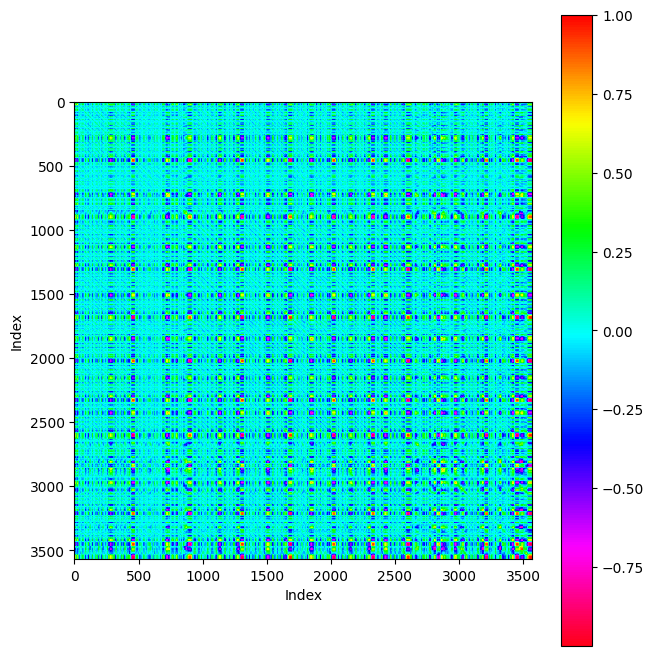

In [9]:
plt.figure(figsize=(20/3, 20/3), )
plt.xlabel('Index', fontsize=10)
plt.ylabel('Index', fontsize=10)
plt.imshow(np.corrcoef(cov), cmap = 'hsv_r') #[100:, 100:]
# plt.title('cola correlation matrix', fontsize=20)
plt.colorbar()
plt.tight_layout()
plt.savefig('trippyshit.pdf', dpi=300)
plt.show()


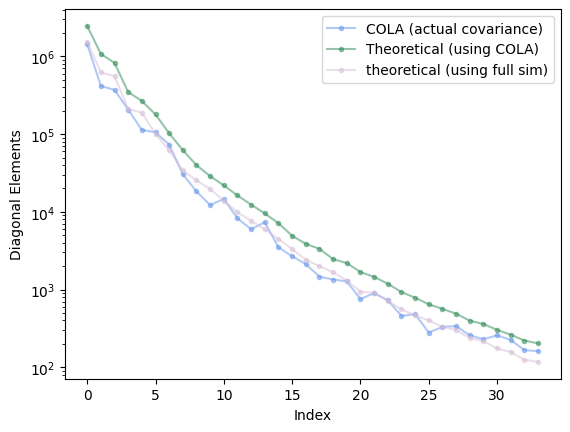

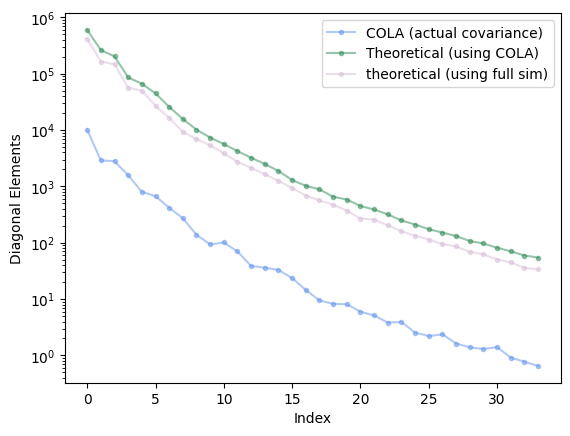

In [16]:
plt.plot(np.diag(cov)[0:34],'.-',label='COLA (actual covariance)', alpha=0.5, color='cornflowerblue')

plt.plot(np.diag(cola_th_mean)[0:34],'.-', label='Theoretical (using COLA)', alpha=0.5, color='seagreen')
plt.plot(np.diag(theory)[0:34],'.-',label='theoretical (using full sim)', alpha=0.5, color='thistle')


plt.legend(loc='upper right')
# plt.ylabel('diagonal of covariance matrix')
plt.ylabel('Diagonal Elements')
plt.xlabel('Index')

plt.yscale('log')
# plt.savefig('Covariances-diffs.pdf')
plt.show()


plt.plot(np.diag(cov)[34:68],'.-',label='COLA (actual covariance)', alpha=0.5, color='cornflowerblue')

plt.plot(np.diag(cola_th_mean)[34:68],'.-', label='Theoretical (using COLA)', alpha=0.5, color='seagreen')
plt.plot(np.diag(theory)[34:68],'.-',label='theoretical (using full sim)', alpha=0.5, color='thistle')


plt.legend(loc='upper right')
# plt.ylabel('diagonal of covariance matrix')
plt.ylabel('Diagonal Elements')
plt.xlabel('Index')

plt.yscale('log')
# plt.savefig('Covariances-diffs.pdf')
plt.show()



In [10]:
# sanity checks
# calculate cola theoretical with mean !
# compare cola vs true sim 
#also plot power spectrum themselves
#may be worth checking finite diff


In [ ]:
for x in range(len(cov)):
    if x % 34==0:
        print('yes')

In [7]:
plt.imshow(cov_sec)

NameError: name 'cov_sec' is not defined

In [ ]:
length = comb(13+2,2)
print(length)